# Sentiment Analysis for Movie Reviews

## Overview
![](cnn.png)


## What we will accomplish in this example:

- Create a CNN model for sentiment analysis based on the content of each rewiew.
- Use Keras to train the model for text classification by having it "read" at thousands of examples 
- Check the model's accuracy 

### Dataset

The dataset contains 50000 movies reviews from the Internet Movie Database, split into 25000 reviews for training and 25000 reviews for testing. Half of the reviews are positive (1) and half are negative (0).

The dataset has already been preprocessed, and each word has been replaced by an integer index. The reviews are thus represented as varying-length sequences of integers. (Word indices begin at "3", as "1" is used to mark the start of a review and "2" represents all out-of-vocabulary words. "0" will be used later to pad shorter reviews to a fixed size.)

In [ ]:
import numpy

from keras import optimizers
from keras.datasets import imdb
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.preprocessing import sequence

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


### Loading the dataset

In [ ]:
top_words = 5000 # vocab
# Here each word is replaced by its index number (list)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)



17473536/17464789 [==============================] - 0s 0us/step


### Model Architecture

In [ ]:
# create the model
embedding_vector_length = 32
model = Sequential()
# Embeding turns positive integers (indexes) into dense vectors of fixed size
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=embedding_vector_length, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
opt = optimizers.SGD(lr=0.01, clipnorm=1.)
#opt = optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-04, nesterov=False)
#opt = optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-04, nesterov=True)
#opt = optimizers.RMSprop(lr=0.001, rho=0.9, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

### Training

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=128)

/usr/local/lib/python2.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 22s 988us/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6929 - val_accuracy: 0.5160
Epoch 2/5
22500/22500 [==============================] - 22s 967us/step - loss: 0.6930 - accuracy: 0.5070 - val_loss: 0.6929 - val_accuracy: 0.5124
Epoch 3/5
22500/22500 [==============================] - 22s 964us/step - loss: 0.6928 - accuracy: 0.5156 - val_loss: 0.6927 - val_accuracy: 0.5280
Epoch 4/5
22500/22500 [==============================] - 22s 966us/step - loss: 0.6927 - accuracy: 0.5203 - val_loss: 0.6928 - val_accuracy: 0.5028
Epoch 5/5
22500/22500 [==============================] - 22s 969us/step - loss: 0.6925 - accuracy: 0.5219 - val_loss: 0.6926 - val_accuracy: 0.5320


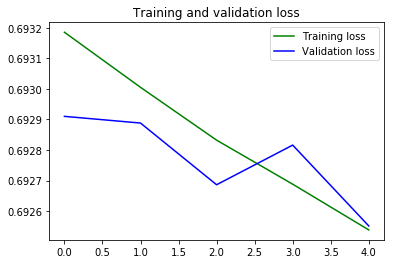

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluation

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.6928065874481201, 0.5166000127792358]

### Example

In [ ]:
example = 16000
a = X_test[example,:]
data_input = numpy.array([a])
c = model.predict_classes(data_input)
print "predicted class: ", c[0] 
prob = model.predict_proba(data_input)
print "probability: ", prob[0]
print "ground truth:", y_test[example]

predicted class:  [1]
probability:  [0.5060555]
ground truth: 0


In [ ]:
#looking back at the text https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification
INDEX_FROM = 3
word_to_id = imdb.get_word_index()
word_to_id = {k:(v + INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
print(' '.join(id_to_word[id] for id in X_test[example] if id_to_word[id] != "<PAD>"))

<START> this movie about a man on the run for killing a <UNK> is the kind of film you can watch entirely on fast forward once you know who's who and not lose a thing it has an attractive cast but the plot is a <UNK> <UNK> guide to cinema cliche and boy does the dialogue
